In [1]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.viewer import showMesh
import numpy as np
import matplotlib.pyplot as plt

Mesh: Nodes: 10 Cells: 0 Boundaries: 13
Mesh: Nodes: 1526 Cells: 2895 Boundaries: 4420


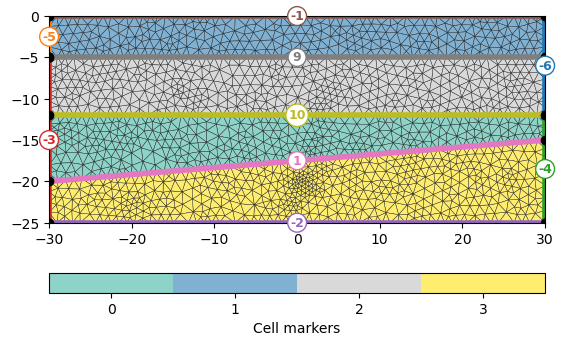

In [27]:
left = -30
right = 30
depth = 25

world = mt.createWorld(start = [left,0], end = [right, -depth], layers = [-5, -12])

line = mt.createLine(start=[left,-20], end=[right,-15])

geometry = world + line

print(geometry)

mesh = mt.createMesh(geometry, quality = 34, area = 1, smooth = True)
print(mesh)

left_h = -5
right_h = -12

for bound in mesh.boundaries():
    x = bound.center().x()
    y = bound.center().y()
    if x == mesh.xmin():
        if y<left_h:
            bound.setMarker(-3)
        else:
            bound.setMarker(-5)
    elif x == mesh.xmax():
        if y<right_h:
            bound.setMarker(-4)
        else:
            bound.setMarker(-6)

pg.show(mesh, markers = True, showMesh = True);

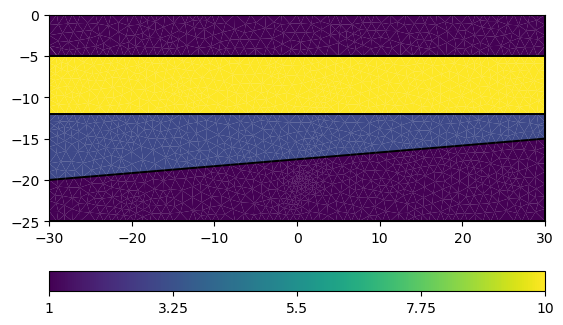

In [36]:
amap = [[0, 3.0], [1, 1.0], [2, 10.0], [3, 1.0]]
showMesh(mesh, amap);

18/01/23 - 16:21:32 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker <function <lambda> at 0x0000021C95AAD940> within mesh.


Mesh:  Mesh: Nodes: 1526 Cells: 2895 Boundaries: 4420
Assembling time:  0.039
Solving time:  0.025


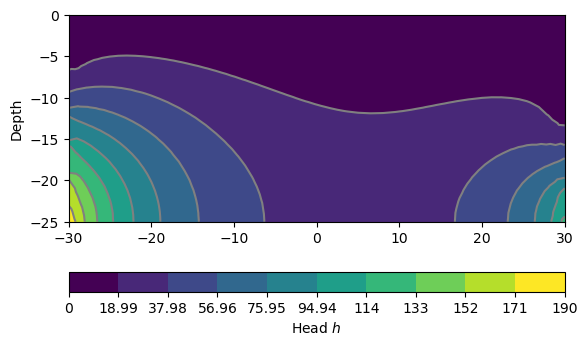

In [33]:
gamma = 9.8

dirichletBC = { -1: 0,
                -3: lambda boundary: abs((boundary.center()[1])-left_h)*gamma,
                -4: lambda boundary: abs((boundary.center()[1])-right_h)*gamma}

NeumannBC = {                 -2: 0}

f = lambda cell: 0,-9.8
h = pg.solve(mesh, a = amap, f = f, bc={'Dirichlet': dirichletBC, 'Neumann': NeumannBC}, verbose = True)
ax, cbar = showMesh(mesh, data=h, label='Head $h$', nLevs=11)
ax.set_ylabel('Depth');

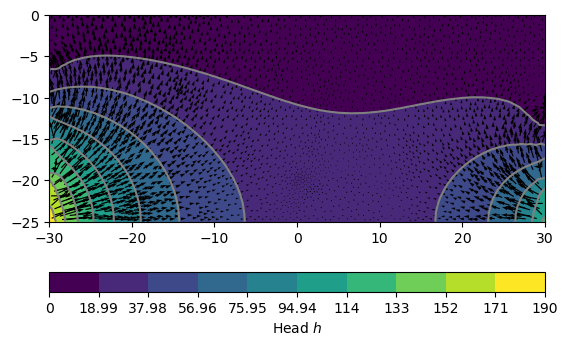

In [35]:
from pygimli.viewer.mpl import drawStreams
ax, cb = showMesh(mesh, data=h, label='Head $h$', nLevs=11)
drawStreams(ax, mesh, pg.solver.grad(mesh, -h), quiver = True)

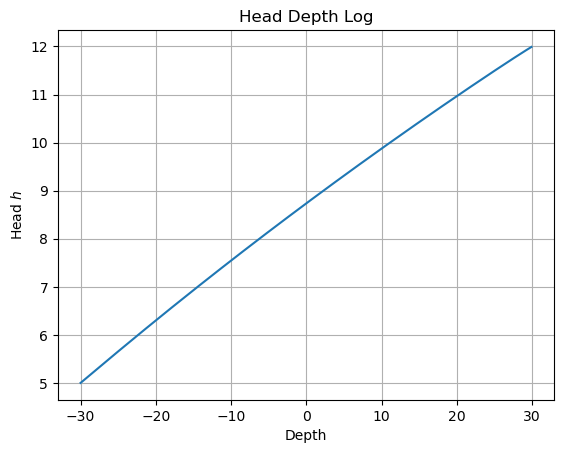

In [55]:
depth = np.arange(-30, 30, 0.1)
pos = [[d, -15] for d in depth]
hlog = pg.interpolate(mesh, h, pos)
fig, ax = plt.subplots()
ax.plot(depth, hlog)
# ax.set_ylim([max(depth), 0])
ax.set_title('Head Depth Log')
ax.set_xlabel('Depth')
ax.set_ylabel('Head $h$')
ax.grid(True)